In [20]:
import geopandas as gpd
from shapely.geometry import Point, MultiPoint, Polygon
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# массив ТЛО опоры
list_1 = [[184706907, 576535759, 41029],
 [184706892, 576535770, 41006],
 [184707037, 576535996, 40855],
 [184706797, 576535831, 40873],
 [184707018, 576536009, 40831],
 [184706693, 576535903, 40712],
 [184706594, 576535968, 40405],
 [184706597, 576535963, 40448],
 [184706580, 576535969, 40461],
 [184706591, 576535979, 40455],
 [184706509, 576536019, 40451],
 [184706497, 576536033, 40446],
 [184706482, 576536034, 40370]]


In [106]:
mp = MultiPoint(list_1)

In [107]:
c = mp.centroid
print(c)

POINT (184706707.2307692 576535941)


In [108]:
b = c.buffer(250)

In [109]:
cut = mp.intersection(b)

In [110]:
l1 = np.array(cut)

In [111]:
l1[:,0]

array([1.84706482e+08, 1.84706497e+08, 1.84706509e+08, 1.84706580e+08,
       1.84706591e+08, 1.84706594e+08, 1.84706597e+08, 1.84706693e+08,
       1.84706797e+08])

In [112]:
X = l1[:,0].reshape(-1, 1)
y = l1[:,1]

In [113]:
X

array([[1.84706482e+08],
       [1.84706497e+08],
       [1.84706509e+08],
       [1.84706580e+08],
       [1.84706591e+08],
       [1.84706594e+08],
       [1.84706597e+08],
       [1.84706693e+08],
       [1.84706797e+08]])

In [117]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))

Slope: -0.65
Intercept: 696801941.90


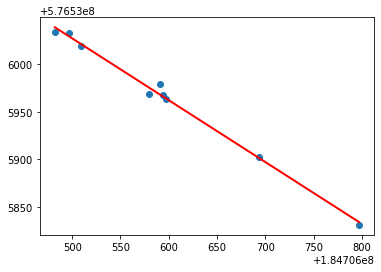

In [115]:
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='red', linewidth=2)

In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
print('r2_score: {:.3f}'.format(r2_score(y, slr.predict(X))))
print('MAE: {:.3f}'.format(mean_absolute_error(y, slr.predict(X))))
print('MSE: {:.3f}'.format(mean_squared_error(y, slr.predict(X))))
print('MedAE: {:.3f}'.format(median_absolute_error(y, slr.predict(X))))

r2_score: 0.994
MAE: 3.970
MSE: 24.334
MedAE: 2.944


In [63]:
poly = cut.convex_hull
poly_buf = poly.buffer(100)
poly_c = poly_buf.centroid

In [64]:
rect = cut.minimum_rotated_rectangle
rect_c = rect.centroid

<AxesSubplot:>

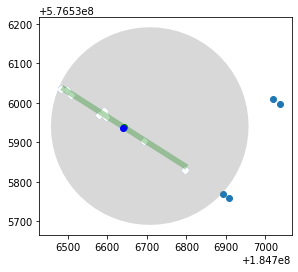

In [65]:
ax = gpd.GeoSeries(mp).plot()
gpd.GeoSeries(b).plot(ax=ax, color='grey', alpha=0.3)

gpd.GeoSeries(cut).plot(ax=ax, color='white')
#gpd.GeoSeries(poly).plot(ax=ax, color='blue', alpha=0.3)
#gpd.GeoSeries(poly_buf).plot(ax=ax, color='yellow', alpha=0.3)
gpd.GeoSeries(rect).plot(ax=ax, color='green', alpha=0.3)
gpd.GeoSeries(rect_c).plot(ax=ax, color='green')
gpd.GeoSeries(poly_c).plot(ax=ax, color='blue')

In [10]:
z_m = np.mean(mp, axis=0)[2] 

In [11]:
np.max(mp, axis=0)[2], np.min(mp, axis=0)[2]

(41029.0, 40370.0)

In [12]:
mp_z = []
for i in range(len(mp)):
    if mp[i].z > z_m:
        mp_z.append(mp[i])
mp_z = MultiPoint(mp_z)

In [13]:
print(mp_z[1])

POINT Z (184706892 576535770 41006)


In [17]:
# x-y bounding box is a (minx, miny, maxx, maxy) tuple
bo = mp.bounds
bo_xmin = bo[0]
bo_xmax = bo[2]
bo_ymin = bo[1]
bo_ymax = bo[3]

In [35]:
print(bo_xmin,
bo_xmax,
bo_ymin,
bo_ymax)

184706482.0 576535759.0 184707037.0 576536183.0


In [45]:
def ifinbounds(x, y, bounds):
    if bounds[2] >= x >= bounds[0] and bounds[3] >= y >= bounds[1]:
        return True
    else: 
        return False

In [55]:
test_x, test_y = 184706690, 576535964
ifinbounds(test_x, test_y, bo)

True